<a href="https://colab.research.google.com/github/god05212/Machine-Learning2/blob/main/Machine_Learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 사용한 데이터셋
> Health Insurance Cross Sell Prediction: Predict Health Insurance Owners' who will be interested in Vehicle Insurance
- Analytics Vidhya
- https://www.kaggle.com/anmolkumar
- https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

# Introduction

## Data description
- id :	고객 고유번호
- Gender : 성별
- Age	: 나이
- Driving_License :	
  - 0 : 면허를 보유하지 않음
  - 1 : 면허를 보유 중
- Region_Code :	고객 지역 고유코드
- Previously_Insured	: 
  - 1 : 이미 자동차보험 보유
  - 0 : 아직 자동차보험 미보유
- Vehicle_Age	: 자동차 연식
- Vehicle_Damage	: 
  - 1 : 과거에 자동차에 손상을 입힌 적이 있음
  - 0 : 과거에 자동차에 손상을 입힌 적이 없음
- Annual_Premium : 보험료
- PolicySalesChannel :	건강보험을 가입하게 된 경로
- Vintage	: 건강보험 보유기간
- Response	:
  - 1 : 관심 있음
  - 0 : 관심 없음

# Basic Exploration

## Read dataset

In [15]:
from google.colab import files
updloaded = files.upload()

Saving Test.csv to Test (1).csv
Saving Train.csv to Train (1).csv


In [149]:
import pandas as pd
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

## Some information

> 데이터 내용 표시

In [150]:
train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [151]:
test.head()

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110   Male   25                1         11.0                   1   
1  381111   Male   40                1         28.0                   0   
2  381112   Male   47                1         28.0                   0   
3  381113   Male   24                1         27.0                   1   
4  381114   Male   27                1         28.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No         35786.0                 152.0       53  
1    1-2 Year            Yes         33762.0                   7.0      111  
2    1-2 Year            Yes         40050.0                 124.0      199  
3    < 1 Year            Yes         37356.0                 152.0      187  
4    < 1 Year             No         59097.0                 152.0      297

> 행과 열의 수

In [152]:
train_num_rows, train_num_cols = train.shape
print(f'Train data \nNumber of rows : {train_num_rows}\nNumber of columns: {train_num_cols}')

Train data 
Number of rows : 381109
Number of columns: 12


In [153]:
test_num_rows, test_num_cols = test.shape
print(f'Train data \nNumber of rows : {test_num_rows}\nNumber of columns: {test_num_cols}')

Train data 
Number of rows : 127037
Number of columns: 11


> 기본 정보

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [155]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


>> 훈련 데이터 세트와 테스트 데이터 세트는 모두 non-null 값을 가집니다. 따라서 결측값을 처리할 필요가 없습니다.

> Description

In [156]:
train.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [157]:
train.describe(include=['object'])

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

In [158]:
test.describe()

id            Age  Driving_License    Region_Code  \
count  127037.000000  127037.000000    127037.000000  127037.000000   
mean   444628.000000      38.765903         0.998134      26.459866   
std     36672.567411      15.465814         0.043152      13.209916   
min    381110.000000      20.000000         0.000000       0.000000   
25%    412869.000000      25.000000         1.000000      15.000000   
50%    444628.000000      36.000000         1.000000      28.000000   
75%    476387.000000      49.000000         1.000000      35.000000   
max    508146.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel        Vintage  
count       127037.000000   127037.000000         127037.000000  127037.000000  
mean             0.460039    30524.643576            111.800468     154.318301  
std              0.498403    16945.297103             54.371765      83.661588  
min              0.000000     2630.000000              1.000000      10.000000  
25%              0.000000    24325.000000             26.000000      82.000000  
50%              0.000000    31642.000000            135.000000     154.000000  
75%              1.000000    39408.000000            152.000000     227.000000  
max              1.000000   472042.000000            163.000000     299.000000

In [159]:
test.describe(include=['object'])

Gender Vehicle_Age Vehicle_Damage
count   127037      127037         127037
unique       2           3              2
top       Male    1-2 Year            Yes
freq     68236       66699          63835

## Data visualization

> 성별에 따른 관심 여부

In [160]:
import plotly.express as px
fig=px.histogram(train,
                x='Response',
                marginal='box',
                color='Gender',
                color_discrete_sequence=['#87C691', '#AD87C6'],
                title='Gender and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

>> 성별이 고객의 관심여부에서 큰 역할을 하지 못하고 긍정적인 반응과 부정적인 반응의 비율이 거의 같다는 점이 눈에 띕니다.

> 나이에 따른 관심 여부

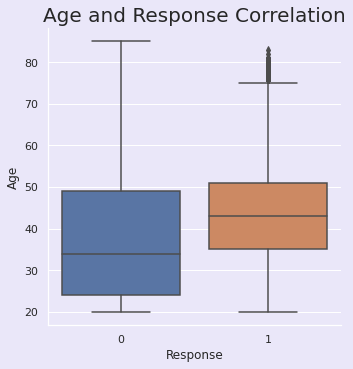

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="Response",y="Age", data=train, kind='box')
plt.title("Age and Response Correlation", size=20, y=1.0);

>> 35세 미만의 젊은이들은 보험에 거의 관심이 없습니다. 35세 이상의 사람들은 보험에 더 관심이 많은 경향이 있습니다.

> 운전면허 여부에 따른 관심 여부

In [162]:
fig=px.histogram(train,
                x='Response',
                marginal='box',
                color='Driving_License',
                color_discrete_sequence=['#87C691', '#AD87C6'],
                title='Driving License and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

>> 운전면허증의 여부는 고객의 관심여부에 큰 역할을 하지 않습니다.

> 지역 코드에 따른 관심 여부

In [163]:
fig=px.histogram(train,
                x='Region_Code',
                marginal='box',
                color='Response',
                color_discrete_sequence=['#87C691', '#AD87C6'],
                title='Region code and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

>> 지역과 관심 여부의 상관 관계가 적습니다.

> 건강보험 보유기간에 따른 관심 여부

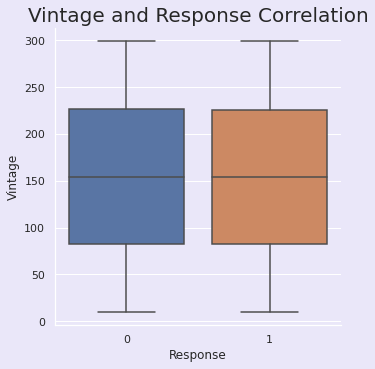

In [164]:
sns.catplot(x="Response", y="Vintage", data=train, kind="box")
plt.title("Vintage and Response Correlation", size=20, y=1.0);

>> 건강보험 보유기간은 관심 여부에 아무런 영향이 없는 것 같습니다. 긍정적인 반응과 부정적인 반응의 비율이 거의 동일한 것으로 보입니다.

> 과거 자동차에 손상을 입힌 경험의 여부에 따른 관심 여부

In [165]:
fig=px.histogram(train,
                x='Response',
                marginal='box',
                color='Vehicle_Damage',
                color_discrete_sequence=['#87C691', '#AD87C6'],
                title='Vehicle_Damage and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

>> 과거 자동차에 손상을 입힌 경험이 있을 수록 긍정적으로 반응하는 경향이 있습니다.

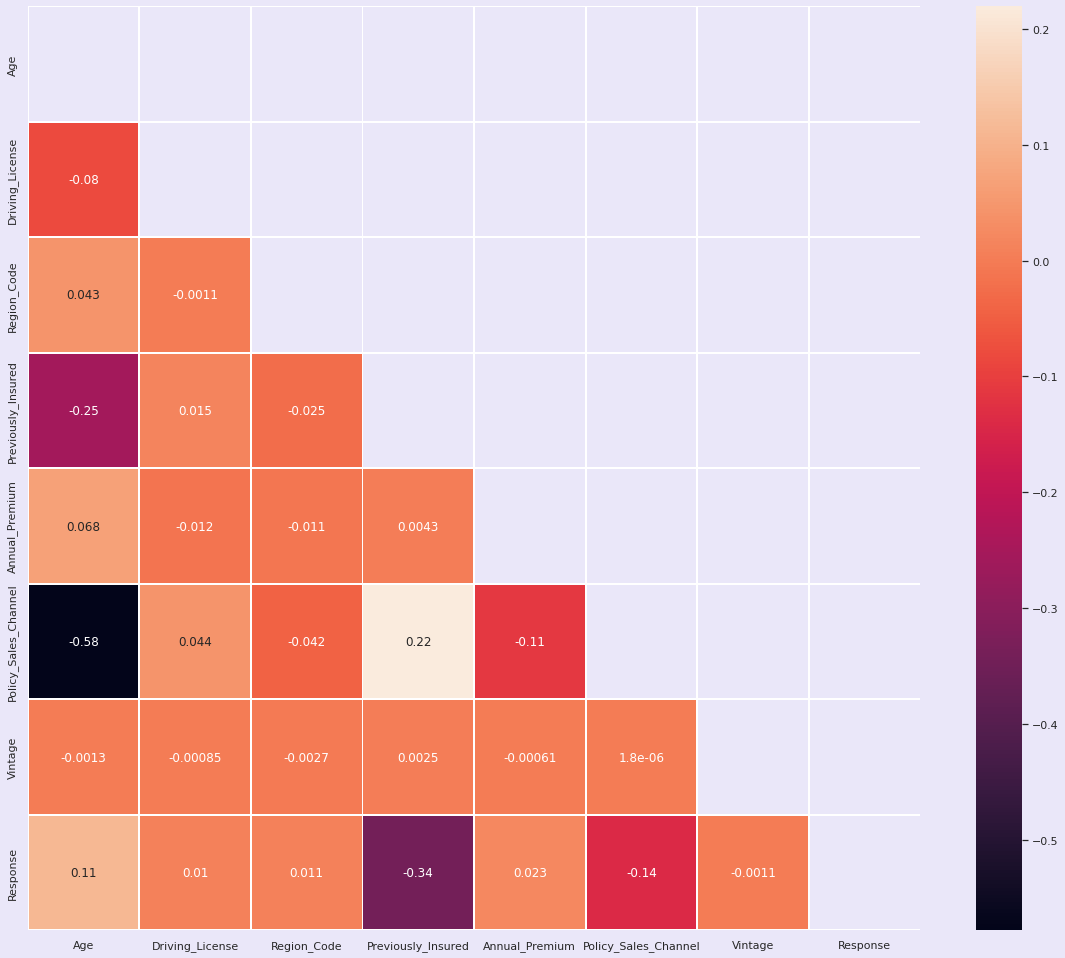

In [166]:
import numpy as np
corr_data=train.drop(['id'], inplace=False, axis=1)
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

# Data preprocessing

> 쓸 일 없는 ID 열은 train 및 test 데이터에서 모두 제거합니다.

In [167]:
train.drop("id", inplace=True, axis=1)
test.drop("id",inplace=True, axis=1)

> 범주형 데이터를 숫자 데이터로 분류합니다.

In [168]:
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})
test['Gender']=test['Gender'].replace({'Male':1,'Female':0})
train['Vehicle_Age'].unique()
test['Vehicle_Age'].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [169]:
train['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
train['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)
test['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
test['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

In [170]:
train.head()
test.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   25                1         11.0                   1            1   
1       1   40                1         28.0                   0            2   
2       1   47                1         28.0                   0            2   
3       1   24                1         27.0                   1            1   
4       1   27                1         28.0                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0               0         35786.0                 152.0       53  
1               1         33762.0                   7.0      111  
2               1         40050.0                 124.0      199  
3               1         37356.0                 152.0      187  
4               0         59097.0                 152.0      297

> 속성 간의 상관 관계

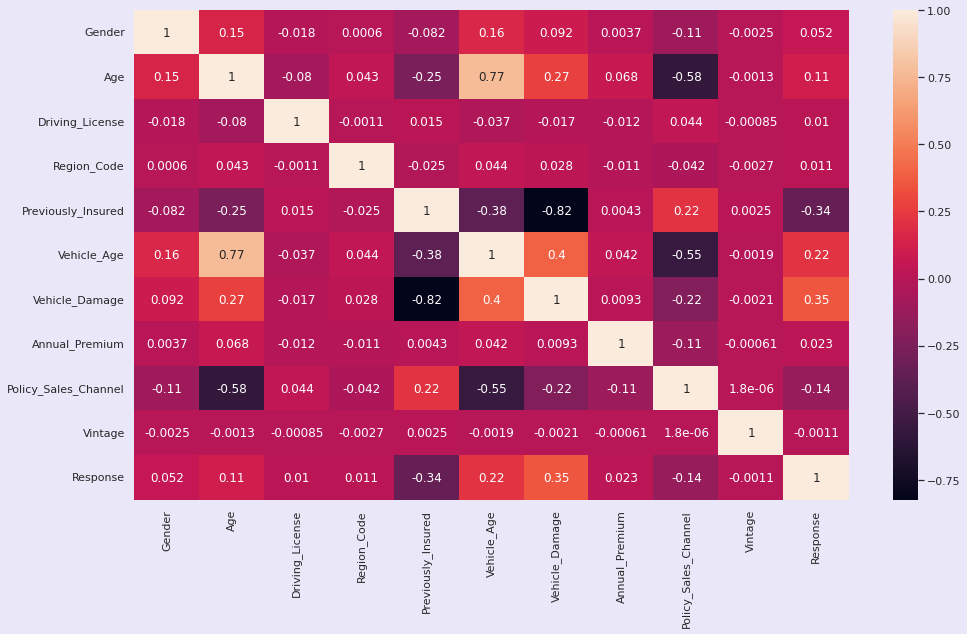

In [171]:
plt.figure(figsize=(16,9))
sns.heatmap(train.corr(), annot=True);

> 높은 상관관계인 열은 더 나은 정확도를 제공하는데 사용할 수 있습니다.

In [172]:
hig_corr = train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

> 숫자 데이터의 크기를 조정합니다.

In [190]:
numeric_cols=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train[numeric_cols])
train[numeric_cols]=scaler.transform(train[numeric_cols])
test[numeric_cols]=scaler.transform(test[numeric_cols])
train.describe().loc[['min', 'max']]

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
min     0.0  0.0              0.0          0.0                 0.0   
max     1.0  1.0              1.0          1.0                 1.0   

     Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
min          1.0             0.0             0.0                   0.0   
max          3.0             1.0             1.0                   1.0   

     Vintage  Response  
min      0.0       0.0  
max      1.0       1.0

In [192]:
test.describe().loc[['min', 'max']]

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
min     0.0  0.0              0.0          0.0                 0.0   
max     1.0  1.0              1.0          1.0                 1.0   

     Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
min          1.0             0.0             0.0                   0.0   
max          3.0             1.0             1.0                   1.0   

     Vintage  
min      0.0  
max      1.0

In [193]:
train.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0       1  0.369231                1     0.538462                   0   
1       1  0.861538                1     0.057692                   0   
2       1  0.415385                1     0.538462                   0   
3       1  0.015385                1     0.211538                   1   
4       0  0.138462                1     0.788462                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0            3               1        0.070366              0.154321   
1            2               0        0.057496              0.154321   
2            3               1        0.066347              0.154321   
3            1               0        0.048348              0.932099   
4            1               0        0.046259              0.932099   

    Vintage  Response  
0  0.716263         1  
1  0.598616         0  
2  0.058824         1  
3  0.667820         0  
4  0.100346         0

In [194]:
test.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0       1  0.076923                1     0.211538                   1   
1       1  0.307692                1     0.538462                   0   
2       1  0.415385                1     0.538462                   0   
3       1  0.061538                1     0.519231                   1   
4       1  0.107692                1     0.538462                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  
0            1               0        0.070633              0.932099  0.148789  
1            2               1        0.066321              0.037037  0.349481  
2            2               1        0.079717              0.759259  0.653979  
3            1               1        0.073978              0.932099  0.612457  
4            1               0        0.120293              0.932099  0.993080

# Machine Learning model

In [204]:
target = 'Response'
X = train.drop(target, axis = 1)
y = train[target]

> train/validation 데이터 셋으로 나누어 주었다.

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic=LogisticRegression(solver='liblinear')
logistic.fit(X_train, y_train)
train_preds=logistic.predict(X_train)
train_probs=logistic.predict_proba(X_train)
accuracy_score(y_train, train_preds)

0.8779154244031395

Accuracy: 87.79%


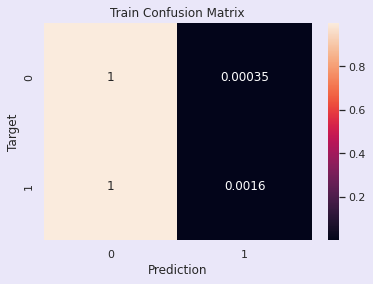

In [216]:
from sklearn.metrics import confusion_matrix
def predict_and_plot(inputs, targets,name=''):
    preds=logistic.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds
train_preds=predict_and_plot(X_train, y_train,'Train')

Accuracy: 87.50%


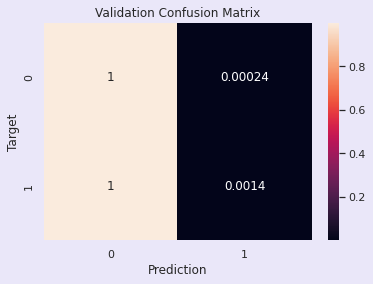

In [217]:
val_preds=predict_and_plot(X_val, y_val,'Validation')

>> 로지스틱 회귀  
Training Accuracy - 87.79%  
Validation Accuracy - 87.50%

## Random Forest Classifier

In [219]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(n_jobs=-1, random_state=42)
model_2.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [220]:
model_2.score(X_train, y_train)

0.9998622440445148

Accuracy: 86.50%


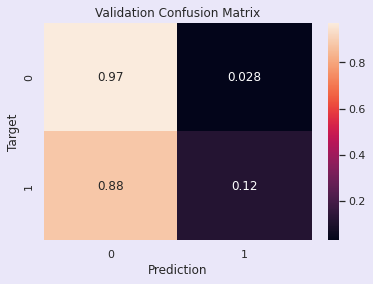

In [221]:
from sklearn.metrics import confusion_matrix
def predict_and_plot_2(inputs, targets,name=''):
    preds=model_2.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds
val_preds_2 = predict_and_plot_2(X_val, y_val, 'Validation')

>> 하이퍼파라미터 튜닝 없는 랜덤 포레스트  
Training Accuracy - 99.99%  
Validation Accuracy - 86.50%  
이 모델은 Training Accuracy가 매우 높고 Validation Accuracy가 낮기 때문에 과적합인 것 같습니다.

## Hyperparameter Tuning of Random Forest

In [222]:
model_2.feature_importances_

array([0.01377792, 0.14299035, 0.00052909, 0.10698464, 0.04813046,
       0.01911754, 0.07683715, 0.24981284, 0.06238414, 0.27943588])

In [223]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model_2.feature_importances_
}).sort_values('importance',ascending=False)
importance_df

feature  importance
9               Vintage    0.279436
7        Annual_Premium    0.249813
1                   Age    0.142990
3           Region_Code    0.106985
6        Vehicle_Damage    0.076837
8  Policy_Sales_Channel    0.062384
4    Previously_Insured    0.048130
5           Vehicle_Age    0.019118
0                Gender    0.013778
2       Driving_License    0.000529

> 하이퍼파라미터(n_estimators) 테스트

In [224]:
model_2_1_1 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 10)
model_2_1_1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [225]:
model_2_1_1.score(X_train, y_train)

0.986667191451259

In [226]:
model_2_1_1.score(X_val, y_val)

0.8618509091863241

In [228]:
model_2_1_2 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 20)
model_2_1_2.fit(X_train,y_train)
print("Training Accuracy = ",model_2_1_2.score(X_train, y_train))
print("Validation Accuracy = ",model_2_1_2.score(X_val, y_val))

Training Accuracy =  0.9956410079800057
Validation Accuracy =  0.8631497467922647


In [229]:
model_2_1_3 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 100)
model_2_1_3.fit(X_train,y_train)
print("Training Accuracy = ",model_2_1_3.score(X_train, y_train))
print("Validation Accuracy = ",model_2_1_3.score(X_val, y_val))

Training Accuracy =  0.9998622440445148
Validation Accuracy =  0.8649733672692923


In [230]:
model_2_1_4 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 200)
model_2_1_4.fit(X_train,y_train)
print("Training Accuracy = ",model_2_1_4.score(X_train, y_train))
print("Validation Accuracy = ",model_2_1_4.score(X_val, y_val))

Training Accuracy =  0.9998852033704291
Validation Accuracy =  0.864802812836189


> Maybe best value=100

> 하이퍼파라미터(max_features 테스트

In [231]:
model_2_2_1 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 2)
model_2_2_1.fit(X_train,y_train)
print("Training Accuracy = ",model_2_2_1.score(X_train, y_train))
print("Validation Accuracy = ",model_2_2_1.score(X_val, y_val))

Training Accuracy =  0.9998524043334087
Validation Accuracy =  0.8648684106950749


In [233]:
model_2_2_2 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 10)
model_2_2_2.fit(X_train,y_train)
print("Training Accuracy = ",model_2_2_2.score(X_train, y_train))
print("Validation Accuracy = ",model_2_2_2.score(X_val, y_val))

Training Accuracy =  0.9998425646223027
Validation Accuracy =  0.8632678229382593


In [234]:
model_2_2_3 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 6)
model_2_2_3.fit(X_train,y_train)
print("Training Accuracy = ",model_2_2_3.score(X_train, y_train))
print("Validation Accuracy = ",model_2_2_3.score(X_val, y_val))

Training Accuracy =  0.9998556842371108
Validation Accuracy =  0.8651832804177272


> Maybe best value=6

> 최상의 하이퍼파라미터를 모두 사용합니다.

In [235]:
model_2_all = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=100,
                               max_features=6)
model_2_all.fit(X_train,y_train)
print("Training Accuracy = ",model_2_all.score(X_train, y_train))
print("Validation Accuracy = ",model_2_all.score(X_val, y_val))

Training Accuracy =  0.9998556842371108
Validation Accuracy =  0.8651832804177272


>> Training Accuracy = 0.9998556842371108  
Validation Accuracy = 0.8651832804177272  
하이퍼파라미터를 조정함에도 큰 변화는 보이지 않았습니다.

## Decision Tree Classifier

In [236]:
from sklearn.tree import DecisionTreeClassifier
model_3=DecisionTreeClassifier(random_state=42)
model_3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [237]:
train_preds_3=model_3.predict(X_train)
train_probs_3=model_3.predict_proba(X_train)
accuracy_score(y_train, train_preds_3)

0.9998852033704291

Accuracy: 86.50%


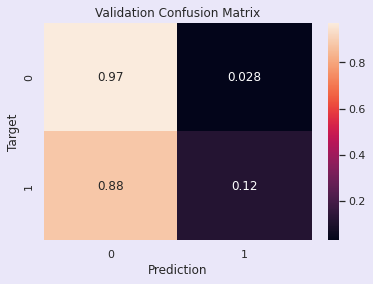

In [238]:
def predict_and_plot_3(inputs, targets, name=''):
    preds = model_3.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds
val_preds = predict_and_plot_2(X_val, y_val, 'Validation')

>> 하이퍼파라미터 튜닝 없는 의사결정 트리  
Training Accuracy = 99.99%  
Validation Accuracy = 82.18%